 # Exploratory Data anlysis
 
 Objective : Given a new flower our objective is to identify weather it is setosa, versicolour or verginica

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset

iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
iris.shape #number of datapoints

(150, 5)

In [4]:
 iris.columns #what are the columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [5]:
# how many datapoints for each class are present?
# (OR) How many flowers for each variety are present?

iris['variety'].value_counts()

# balanced data vs imbalanced data

# iris is a balanced dataset as the number of data points for every class is same

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

# 2-D Scatter Plot

<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

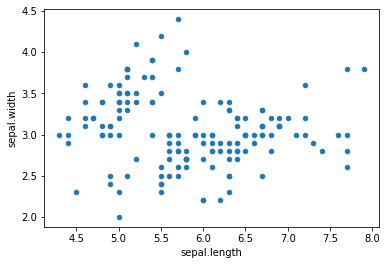

In [6]:
# 2-D scatter plot
# Always understand the asis: labels and scale.

iris.plot(kind ='scatter', x='sepal.length', y='sepal.width')

# cannot make much sence out of it.
# what if we colour the points by thier class-label/flower-type

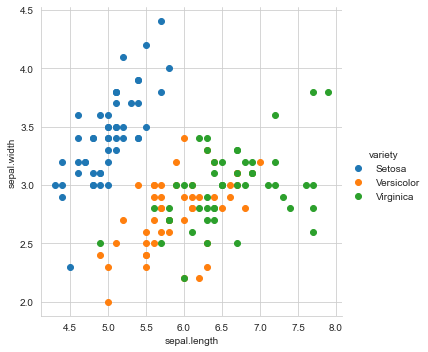

In [7]:
# 2-D plot with colour coding for each flower type/class
# hue='species' color the plot by the variety
sns.set_style('whitegrid');
sns.FacetGrid(iris, hue='variety',height=5)\
   .map(plt.scatter,'sepal.length','sepal.width')\
   .add_legend()
plt.show();



Notice that the blue points can be easily seperated from the red and green by drawing a line.

But red and green data pointa cannot be easily seperated.

Can we draw multiple 2-D scatter plots for each combination?

How many combinations exist? 4C2 = 6

## Obervation(s):

1. Using sepal.lenth and sepal.width features, we can distinguish Sentosa from others. i.e Linerly Seperable

2. separating Versicolour from Virginica is mmuch harder than as they have considerable overlap. 

# 3D Scatter plot
https://plot.ly/pandas/3d-scatter-plots/

needs a lot of mouce interaction to interpret data.

## Pair-plot

pairwise scatter plot: pairplot

**Disadvantages** :
- cannot be used when number of feature are high.
- cannot visualize higher dimentional patters in 3-D and 4-D
- only possible to view 2D patterns.

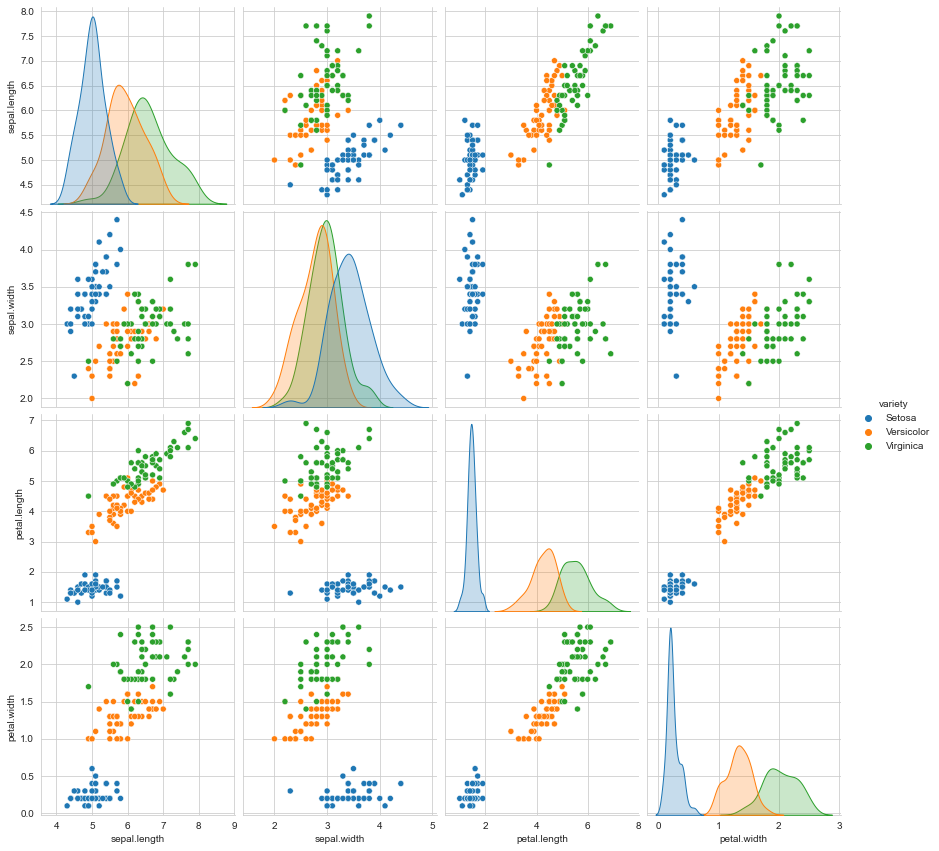

In [8]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(iris,hue='variety',height=3);
plt.show()

Note: The diagonal elements are PDF's for each feature.

# obervation(s):
1. petal.lenght and petal.width are the most useful features to identify various flowers types.

2. While Sentosa can be easily identified(linearly seperable), Virnica and Versicolor have some overlap(almost linearly separable)

3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.

# Limitations of pair-plot

- here in above example we had 4-dimentional data i.e(SL,SW,PL,PW) so 4C2 = 6

- if we have 10 features then, 10C2 and what if we have 100 features then, 100C2 these are a lot of plots to go through each plot and understand.

- pairplots are easy to understand when we have less number of features i.e (4,5,6)

- We need to use PCA, t-SNE to visualize a high dimentional data. 

# Histogram, PDF, CDF
what about 1-D scatter plot using just one feature?
i.e 1-D Scatter plot of petal-length

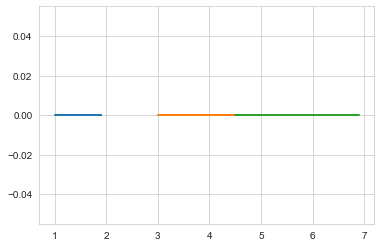

In [9]:
import numpy as np

iris_setosa = iris.loc[iris['variety'] == 'Setosa']
iris_virginica = iris.loc[iris['variety'] == 'Virginica']
iris_versicolor = iris.loc[iris['variety'] == 'Versicolor']

#print(iris_sentosa['petal.length'])

plt.plot(iris_setosa['petal.length'],np.zeros_like(iris_setosa['petal.length']))
plt.plot(iris_versicolor['petal.length'],np.zeros_like(iris_versicolor['petal.length']))
plt.plot(iris_virginica['petal.length'],np.zeros_like(iris_virginica['petal.length']))

plt.show()

Disadvantages of 1-D scatter plot: very hard to make sense as points are overlapping a lot.

/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

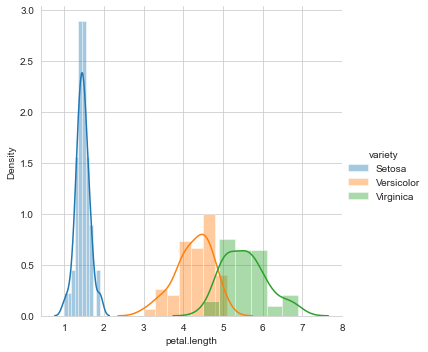

In [10]:
# Distrubution / Density plot of petal length of all flowers

sns.FacetGrid(iris, hue='variety',height=5)\
   .map(sns.distplot, 'petal.length')\
   .add_legend()

plt.show()

PDF(curve) - Smoothed histogram (KDE)

How to build PDF's?
- First we plot histograms and then we smoothen the histogram to get PDF.

Intercepting a PDF:
- why it is called density plot?
- why it is called probability plot?
 


# Univariate analysis using PDF

/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

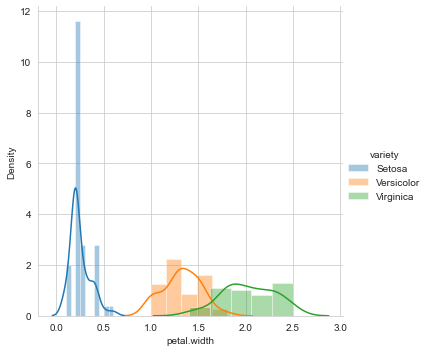

In [11]:
sns.FacetGrid(iris, hue='variety',height=5)\
   .map(sns.distplot, 'petal.width')\
   .add_legend()

plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

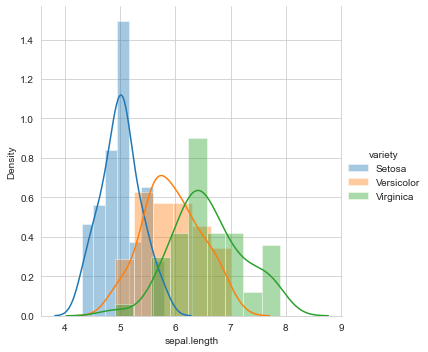

In [12]:
sns.FacetGrid(iris, hue='variety',height=5)\
   .map(sns.distplot, 'sepal.length')\
   .add_legend()

plt.show()

/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

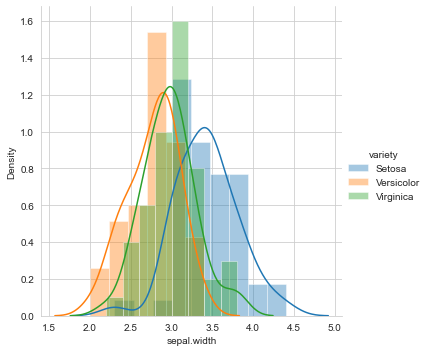

In [13]:
sns.FacetGrid(iris, hue='variety',height=5)\
   .map(sns.distplot, 'sepal.width')\
   .add_legend()

plt.show()

### Obervation(s):

- by plotting the PDF's for all 4 features we have seen that petal.length is perfrming well on separating the class. 

- petal.width is also somewhat performing well.

- If we need to choose single feature to classify the new instance, it should be petal.length

- if you want to classify based on two classes then it should be petal.length and petal.width


overall :  **PL > PW >> SL >> SW**

# Cummulative Distribution Function ( CDF) :

- need for Cummulative Distribution Function(CDF)?
- we can visually see What percentage of versicolor flowers have a petal length of less than 5 ?

### how to construct a CDF?

- For every value of your x axis i.e petal length you say how many points are below that x value

- Another method is to sum all the counts of histogram till the point on x axis. It is called a cummulative sum

- another way, area under the curve of the PDF at a given point on x axis is the CDF

- if you differentiate cdf you'll get pdf and if you do intergation on pdf you will get cdf


[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


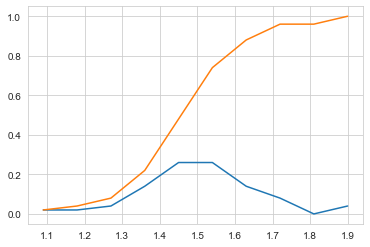

In [14]:
# plot CDF of petal length

counts, bin_edges = np.histogram(iris_setosa['petal.length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts)) # compute pdf
print(pdf)
print(bin_edges)

#compute CDF

cdf = np.cumsum(pdf) # numpy fun to calculate cummulative sum   
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show()

### how to read a CDF?

- Blue line is a PDF and orange line is a CDF

- x axis : petal.lenth of Setosa flowers and y axis: probabilities

- PDF represents how many points it has in any range

- CDF represents: let's assume at any given point There are 82% of setosa flowers that have petal.length <= 1.6

 - 100 % of setosa flowers have petal.lenth less than 1.9
 - 15 % of setosa flowers have petal.length less than 1.3
 - percentage you can read on y-axis
 
- CDF always starts on 0 at left bottom and ends on 1 at right top




[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]


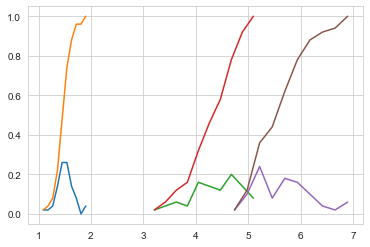

In [15]:
# plots of CDF of petal_length for various types of flowers.

# Miscalssification error if you use peta.length only.

# Setosa

counts, bin_edges = np.histogram(iris_setosa['petal.length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


# versicolor

counts, bin_edges = np.histogram(iris_versicolor['petal.length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


# virginica

counts, bin_edges = np.histogram(iris_virginica['petal.length'],bins=10,
                                 density = True)

pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.show()

## Obervation(s)

- PDF's and CDF's for setosa, versicolor and virginica w.r.t petal length

- if PL < 2 
    then setosa - 100% acccurate
    
- if PL > 2 and PL <= 5
    then versicolor  - 95% of times correct and 5% times incorrect
- if PL > 2 and PL > 5
    then virsicolor - 90% of times correct and 10% of times incorrect

In [ ]:
# Add if else program to predict class label

# Mean, variance and Standard deviation

In [16]:
# mean, varience , std-deviation

# mean tells us about central tendancy, the average. 

'''mean : sum of all values divided my total number of values'''

print('Means:')
print('setosa :',np.mean(iris_setosa['petal.length']))
print('Setosa Mean with an outlier :',np.mean(np.append(iris_setosa['petal.length'],50))) #mean with an outlier
print('Verginica :',np.mean(iris_virginica['petal.length']))
print('Versicolor :',np.mean(iris_versicolor['petal.length']))

print("\nStd-dev:")
print(np.std(iris_setosa['petal.length']))
print(np.std(iris_virginica['petal.length']))
print(np.std(iris_versicolor['petal.length']))




Means:
setosa : 1.4620000000000002
Setosa Mean with an outlier : 2.4137254901960787
Verginica : 5.5520000000000005
Versicolor : 4.26

Std-dev:
0.17191858538273283
0.546347874526844
0.4651881339845203


**Varience** : How far the points are spread across the mean 
- What is the average square distance of each point from the mean value. 

**Standard deviation** :  measure of how dispersed the data is in relation to the mean. 

- Low standard deviation means data are clustered around the mean.
- High standard deviation indicates data are more spread out.

# median, Percentile, Quartile , IQR, MAD

median :
1. First sort items incr/decr order
2. pick the middle value

- median will not get corrupted due to the some outliers, but if more than 50 percent values are currupted then the median gets currupted. 

In [17]:
print("\n Medians:")
print(np.median(iris_setosa['petal.length']))
print(np.median(np.append(iris_setosa['petal.length'],50))) # median with an outlier
print(np.median(iris_virginica['petal.length']))
print(np.median(iris_versicolor['petal.length']))


 Medians:
1.5
1.5
5.55
4.35


## Percentile : 
 - If the value is at 5Oth position in an given array it is called as 50th percentile. It tells us than about 50 percent values are less than this value and about 50 percent values are greater than this value.
 
- **Median = 50th percentile value of x = Xs[50]** where Xs is an array


- **25th , 50th, 75th and 100th percentiles are called Quantiles**


- **Amazon Delivery Example** : To understand the number of days it takes for the delivery. When we check 95th or 99th percentile of delivery days, it gives us the insights about how many days it takes to deliver a package for 95 or 99 % times. 


In [18]:
print("\n Quantiles:")
print(np.percentile(iris_setosa['petal.length'],np.arange(0,100,25)))
print(np.percentile(iris_virginica['petal.length'],np.arange(0,100,25)))
print(np.percentile(iris_versicolor['petal.length'],np.arange(0,100,25)))


 Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]


In [19]:
print("\n 90th Percentiles:")
print(np.percentile(iris_setosa['petal.length'],90))
print(np.percentile(iris_virginica['petal.length'],90))
print(np.percentile(iris_versicolor['petal.length'],90))


 90th Percentiles:
1.7
6.31
4.8


## Median Absolute Deviation

In [24]:
# MAD is not available in numpy so we need to import robust from statsmodel 
from statsmodels import robust 

In [27]:
print("\n Median Absolute Deviation")

print(robust.mad(iris_setosa['petal.length']))
print(robust.mad(iris_virginica['petal.length']))
print(robust.mad(iris_versicolor['petal.length']))




 Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


# Box-plot and Whiskers 

- Box-plot with whiskers : another method of visualizing the 1-D scatter plot 
- Box-plot can be visualized as a PDF on the side-ways.

Note : In the plot below, a technique call inter-quartile range is used in whiskers in the plot below do not correspond to the min and max values.

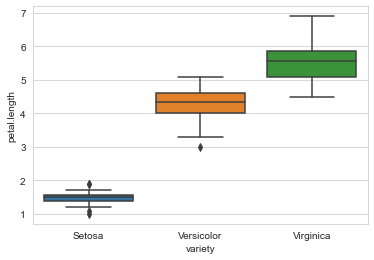

In [29]:
sns.boxplot(x = 'variety', y='petal.length', data=iris)
plt.show()

# Violin plots

- A violin plot combines the benefits of the previous two plots and simplifies them

- Denser regions of the dataare fatter, and sparser ones thinner in a violin plot 

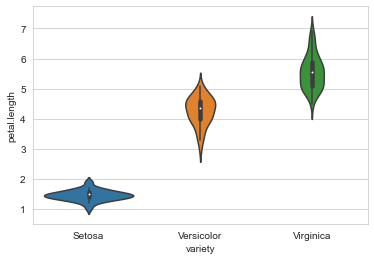

In [30]:
sns.violinplot(x='variety', y = 'petal.length', data = iris, size = 8)
plt.show()

# Multivariate probability density, contour plot

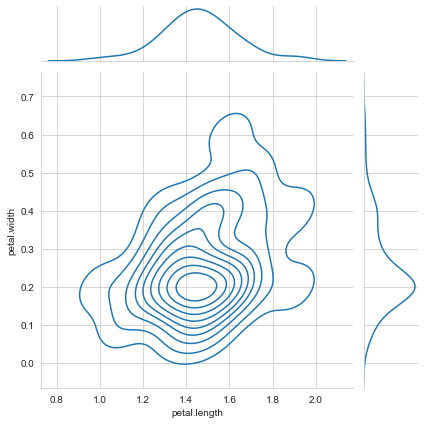

In [35]:
# 2D Density plot, contors-plot
sns.jointplot(x='petal.length',y='petal.width', data = iris_setosa, kind = 'kde')
plt.show()

- 1D density : PDF(probability density function)
- 2D density : CPDF(contour probability density function)

# Q-Q Plot

In [3]:
import numpy as np
import pylab
import scipy.stats as stats

# N(0,1)

std_normal = np.random.normal(loc = 0, scale = 1, size = 1000) #loc -> mean, scale -> std_dev

# 0 to 1000th percentile of std_normal

for i in range(0,101):
    print(i,np.percentile(std_normal,i))

0 -2.987218806098219
1 -2.0647426934052744
2 -1.9580918112801502
3 -1.7898672190620735
4 -1.6717844359430023
5 -1.6146718473656785
6 -1.5130287462384804
7 -1.423404798534458
8 -1.3628902901280888
9 -1.271547659794463
10 -1.2130632621933932
11 -1.1619525743155295
12 -1.1263229343287349
13 -1.0856393828731319
14 -1.0307115427885825
15 -0.9942158727605606
16 -0.9571414327958879
17 -0.9274978014976473
18 -0.8918363147157966
19 -0.8421145516704011
20 -0.7983322017418241
21 -0.766547473996063
22 -0.738477885409434
23 -0.704718825577938
24 -0.6904645084653983
25 -0.650733329039817
26 -0.6148093220511551
27 -0.5794335580744134
28 -0.5527596409996742
29 -0.5247751559252574
30 -0.48265742432180897
31 -0.4612773687545353
32 -0.4343311945896866
33 -0.41907638735953273
34 -0.3874614277903742
35 -0.3591706176211684
36 -0.33580650273671786
37 -0.3121488874170566
38 -0.28238328070156843
39 -0.23936339206015386
40 -0.20606027737619054
41 -0.17382579621801073
42 -0.15942110357990671
43 -0.13138283264715

# Q-Q Plot

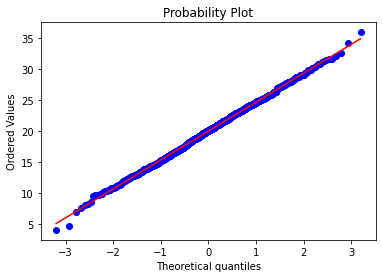

In [5]:
# generate 100 samples from (20,5)

measurements = np.random.normal(loc = 20, scale = 5, size = 1000)
# try size = 1000

stats.probplot(measurements,dist='norm', plot=pylab)
pylab.show()

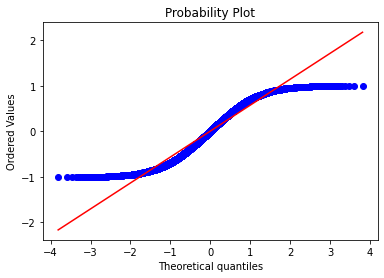

In [7]:
# Genearte with Uniform distribution

measurements = np.random.uniform(low = -1, high = 1, size = 10000)
# try size = 1000

stats.probplot(measurements,dist='norm', plot=pylab)
pylab.show()